In [6]:
##################################
#The notebook needed
%matplotlib inline 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#!/usr/bin/env python
# coding: utf-8
import os
import sys
sys.path.append("./OASIS-master/")
from oasis.functions import deconvolve

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
from importlib import reload  # Python 3.4+ only.
        
import pickle
import numpy, scipy.io

import size_contrast_analysis as sca
import scipy.stats as sst
import sim_utils
reload(sim_utils)
import pyute as ut

outputDir='./Output'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)
    
    
# paths
dsbase = '/Users/dan/Documents/notebooks/mossing-PC/shared_data/'

# dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l23','sst_l23','vip_l23']]


In [17]:
#######################
#parameters

nsize,ncontrast = 5,6
to_exclude = ['session_'+exptname for exptname in ['180714_M9053','180321_M7955', '180519_M8959', '180531_M8961',\
                                                 '180618_M8956','190202_M10075', '190620_M10619','200103_M0388']]

#######################
#Files to analyze

reload(sim_utils)
run_speed_cutoff = 1

for ctr_cutoff in [11]: #

    for pval_cutoff in [0.05]: #

        for running_pct_cutoff in [0.1]: #


            for lt in [False,True]:

                dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','pv_l23','sst_l23','vip_l23']]



                ncelltypes = len(dsnames)
                selection = [None for itype in range(ncelltypes)]
                for itype in range(ncelltypes):
                    with ut.hdf5read(dsnames[itype]) as ds:
                        keylist = list(ds.keys())
                        nexpt = len(keylist)
                        to_keep = np.array([k not in to_exclude for k in keylist])
                        selection[itype] = np.arange(nexpt)[to_keep]



                #########################################################
                #########################################################
                # Run

                rs = sim_utils.gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=pval_cutoff,slices=None,running=lt,fill_nans_under_cutoff=True,running_pct_cutoff=running_pct_cutoff,run_speed_cutoff=run_speed_cutoff)
                #r_spatial=gen_rspatial(dsnames=dsnames,selection=selection,dcutoffs=[0,5,10,15],pval_cutoff=pval_cutoff,slices=None,datafield='decon')
                #########################################################
                paramstring='-running_'+str(lt)+'-pval_cutoff_'+str(pval_cutoff)+'-ctrcutoff_'+str(ctr_cutoff)+'-running_pct_cutoff_'+str(running_pct_cutoff)


                #Save rs

                with open(outputDir+'rs'+paramstring+'.pickle', 'wb') as handle:
                    pickle.dump(rs, handle, protocol=pickle.HIGHEST_PROTOCOL)

                scipy.io.savemat(outputDir+'rs'+paramstring+'.mat', mdict={'rs': rs})    




/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857
<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222
<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.5431547619047619


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.7876984126984127
<HDF5 group "/session_190701_M10615" (9 members)>
decon
0.6691468253968254
<HDF5 group "/session_191212_M0762" (12 members)>
decon
0.8219246031746031
/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857
<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222
<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.9340277777777778
<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444
<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (12 members)>
decon
0.8462301587301587
<HDF5 group "/session_191108_M0403" (12 members)>
decon
0.9970238095238095
<HDF5 group "/session_200822_M0771" (13 members)>
decon
0.9151785714285714
/Users/dan/Documents/notebooks/mossing-PC/shared_data/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
1.0
<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.9350198412698413
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.8606150793650794
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.44543650793650796


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.5277777777777778


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571
<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (13 members)>
decon
0.9404761904761905
<HDF5 group "/session_200109_M0755" (13 members)>
decon
0.9692460317460317
<HDF5 group "/session_200819_M0638" (13 members)>
decon
0.7549603174603174
/Users/dan/Documents/notebooks/mossing-PC/shared_data/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180519_M8959" (9 members)>
decon
0.0575


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.3625


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190710_M0208" (13 members)>
decon
0.7237103174603174
<HDF5 group "/session_191215_M0385" (13 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (13 members)>
decon
0.9191468253968254


/Users/dan/Documents/code/adesnal/sim_utils.py:183: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777
<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301
<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (9 members)>
decon
0.3308531746031746


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191212_M0762" (12 members)>
decon
0.17807539682539683


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857
<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222
<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (12 members)>
decon
0.15376984126984128


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191108_M0403" (12 members)>
decon
0.002976190476190476


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200822_M0771" (13 members)>
decon
0.08482142857142858


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666
<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191224_M0390" (13 members)>
decon
0.05952380952380952


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200109_M0755" (13 members)>
decon
0.030753968253968252


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200819_M0638" (13 members)>
decon
0.24503968253968253


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989
<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (9 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666
<HDF5 group "/session_190710_M0208" (13 members)>
decon
0.27628968253968256


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (13 members)>
decon
0.18998015873015872


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (13 members)>
decon
0.08085317460317461


/Users/dan/Documents/code/adesnal/pyute.py:1204: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/dan/Documents/code/adesnal/sim_utils.py:183: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=

# Locomotion modulation

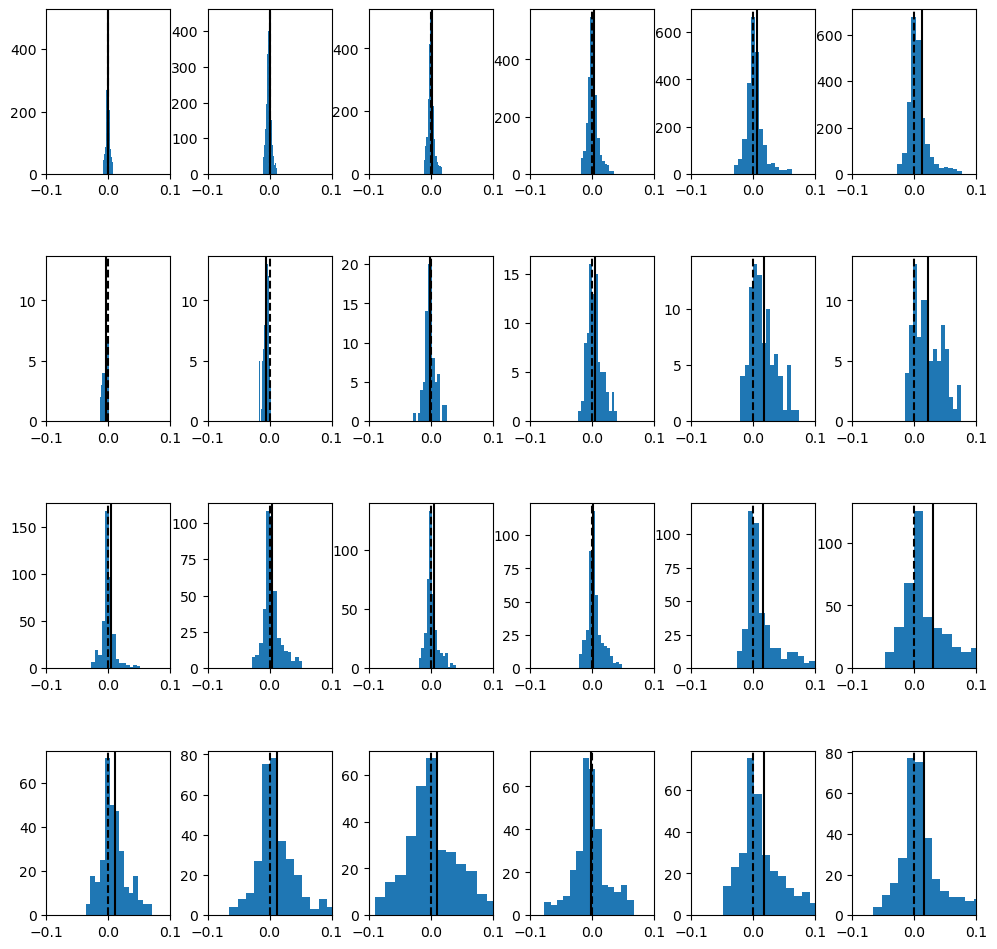

In [11]:
pval_cutoff = 0.05
ctr_cutoff = 11
running_pct_cutoff = 0.1

paramstring_loco='-running_'+str(True)+'-pval_cutoff_'+str(pval_cutoff)+'-ctrcutoff_'+str(ctr_cutoff)    +'-running_pct_cutoff_'+str(running_pct_cutoff)
with open(outputDir+'rs'+paramstring_loco+'.pickle', 'rb') as handle_loco:
    rs_locomotion=pickle.load(handle_loco)


paramstring_stat='-running_'+str(False)+'-pval_cutoff_'+str(pval_cutoff)+'-ctrcutoff_'+str(ctr_cutoff)     +'-running_pct_cutoff_'+str(running_pct_cutoff)
with open(outputDir+'rs'+paramstring_stat+'.pickle', 'rb') as handle_stat:
    rs_stationay=pickle.load(handle_stat)
    
    

this_pops={'E','P','S','V'};
modal_ucontrast=[0, 6, 12, 25 ,50, 100];

c_l=len(modal_ucontrast);
n_l=4;
s_l=0
fig, axs = plt.subplots(n_l,len(modal_ucontrast), figsize=(12, 12),dpi= 100, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)


for k in range(n_l):
    for i in range(c_l):


        runing=rs_locomotion[k+1][0][:,s_l,i]
        stationary=rs_stationay[k+1][0][:,s_l,i]

        diffs=runing-stationary;
        diffs=diffs[~np.isnan(diffs)]


        bins=np.linspace(np.percentile(diffs,5),np.percentile(diffs,95),15);
        axs[k,i].hist(diffs,bins)
        axs[k,i].set_xlim([-0.1, 0.1])

        axs[k,i].axvline(0,c='k',linestyle='dashed')
        axs[k,i].axvline(np.nanmean(diffs),c='k')



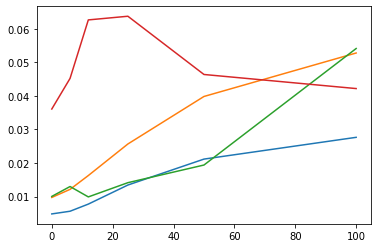

In [15]:
ucontrast=[0,6,12,25,50,100]

for k in range(n_l):
    plt.plot(ucontrast,np.nanmean(rs_stationay[k+1][0][:,0,:],0).transpose())

In [14]:
rs_stationay[k+1][0].shape

(532, 5, 6)